# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))

In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 218us/step - loss: 0.2384 - accuracy: 0.9284 - val_loss: 0.1057 - val_accuracy: 0.9682
Epoch 2/10
48000/48000 [==============================] - 10s 203us/step - loss: 0.0989 - accuracy: 0.9705 - val_loss: 0.0924 - val_accuracy: 0.9729
Epoch 3/10
48000/48000 [==============================] - 10s 203us/step - loss: 0.0697 - accuracy: 0.9782 - val_loss: 0.1125 - val_accuracy: 0.9673
Epoch 4/10
48000/48000 [==============================] - 10s 205us/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.1180 - val_accuracy: 0.9686
Epoch 5/10
48000/48000 [==============================] - 10s 203us/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.1032 - val_accuracy: 0.9722
Epoch 6/10
48000/48000 [==============================] - 10s 201us/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0957 - val_accuracy: 0.9773
Epoch 7/10
48000/48000 [==============================] 

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [19]:
train_history.history

{'val_loss': [0.10567839163821191,
  0.09237457188777626,
  0.11248873338565075,
  0.11804745295129639,
  0.10320675088800878,
  0.09570373326840732,
  0.09870930442977018,
  0.12336093045202445,
  0.11815539631357144,
  0.12395057661780387],
 'val_accuracy': [0.9681666493415833,
  0.9729166626930237,
  0.9673333168029785,
  0.968583345413208,
  0.9721666574478149,
  0.9773333072662354,
  0.9748333096504211,
  0.9731666445732117,
  0.9745000004768372,
  0.9759166836738586],
 'loss': [0.23841309646889566,
  0.09889983463830625,
  0.0697316377373063,
  0.052403355457063296,
  0.04326354512108325,
  0.03792923262486632,
  0.03204377629061007,
  0.026892263021156396,
  0.024891610541337133,
  0.02085867738047735],
 'accuracy': [0.9283958,
  0.9704792,
  0.97816664,
  0.9831667,
  0.98645836,
  0.9883125,
  0.98985416,
  0.9917708,
  0.9924167,
  0.99379164]}

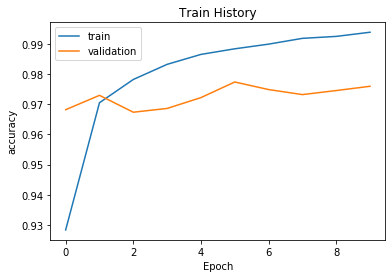

In [20]:
show_train_history(train_history,'accuracy','val_accuracy')

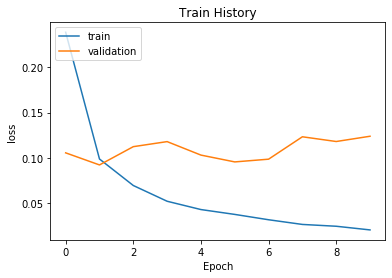

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [21]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 96us/step

accuracy= 0.9751999974250793
